# 1. Import Data from API

In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as datetime
import json,requests

In [113]:
blad = None
kurs_usd = []
kurs_eur = []
kurs_gbp = []
kurs_chf = []

def get_data(api_point,blad):
    data = []
    try:
        # 1. Wykonanie zapytania GET do API
        response = requests.get(api_point, timeout=10) # Ustawienie timeoutu
        # 2. Sprawdzenie, czy odpowiedź jest poprawna (status 200)
        response.raise_for_status() 
        # 3. Parsowanie danych JSON na słownik Pythona
        data = response.json()
        
    except requests.exceptions.RequestException as e:
        # Obsługa błędów związanych z zapytaniem (np. brak połączenia, timeout)
        blad = f"Błąd połączenia z API: {e}"
    except Exception as e:
        # Inne błędy (np. błąd parsowania JSON, choć requests.json() to obsługuje)
        blad = f"Wystąpił nieoczekiwany błąd: {e}"
    return [ data, blad]

   
#[kurs_usd_1 ,blad] = get_data("https://api.nbp.pl/api/exchangerates/rates/a/usd/2023-10-15/2024-10-14/",blad)
#[kurs_usd_2 ,blad] = get_data("https://api.nbp.pl/api/exchangerates/rates/a/usd/2024-10-15/2025-10-14/",blad)
#kurs_usd = np.concatenate((kurs_usd_1['rates'], kurs_usd_2['rates']))

In [114]:
# Kurs Dolar
for cur in range(1,25):
    nex = cur+1
    if cur < 10:
        cur_str = "0"+str(cur)
    else:
        cur_str = str(cur)
    if nex < 10:
        nex_str = "0"+str(nex)
    else:
        nex_str = str(nex)
    
    [kurs_usd_cur ,blad] = get_data("https://api.nbp.pl/api/exchangerates/rates/a/usd/20"+cur_str+"-10-15/20"+nex_str+"-10-14/",blad)
    kurs_usd = np.concatenate(( kurs_usd, kurs_usd_cur['rates']))

df_kurs_usd = pd.DataFrame.from_records(kurs_usd)
#df_kurs_usd = df_kurs_usd.set_index('effectiveDate')
df_kurs_usd.to_csv('kurs_usd.csv')

In [115]:
# Kurs Euro
for cur in range(1,25):
    nex = cur+1
    if cur < 10:
        cur_str = "0"+str(cur)
    else:
        cur_str = str(cur)
    if nex < 10:
        nex_str = "0"+str(nex)
    else:
        nex_str = str(nex)
    
    [kurs_eur_cur ,blad] = get_data("https://api.nbp.pl/api/exchangerates/rates/a/eur/20"+cur_str+"-10-15/20"+nex_str+"-10-14/",blad)
    kurs_eur = np.concatenate(( kurs_eur, kurs_eur_cur['rates']))

df_kurs_eur = pd.DataFrame.from_records(kurs_eur)
#df_kurs_eur = df_kurs_eur.set_index('effectiveDate')
df_kurs_eur.to_csv('kurs_eur.csv')

In [116]:
# Kurs Funt Bretyjski
for cur in range(1,25):
    nex = cur+1
    if cur < 10:
        cur_str = "0"+str(cur)
    else:
        cur_str = str(cur)
    if nex < 10:
        nex_str = "0"+str(nex)
    else:
        nex_str = str(nex)
    
    [kurs_gbp_cur ,blad] = get_data("https://api.nbp.pl/api/exchangerates/rates/a/gbp/20"+cur_str+"-10-15/20"+nex_str+"-10-14/",blad)
    kurs_gbp = np.concatenate(( kurs_gbp, kurs_gbp_cur['rates']))

df_kurs_gbp = pd.DataFrame.from_records(kurs_gbp)
#df_kurs_gbp = df_kurs_gbp.set_index('effectiveDate')
df_kurs_gbp.to_csv('kurs_gbp.csv')

In [117]:
# Kurs Frank Szwajcarski
for cur in range(1,25):
    nex = cur+1
    if cur < 10:
        cur_str = "0"+str(cur)
    else:
        cur_str = str(cur)
    if nex < 10:
        nex_str = "0"+str(nex)
    else:
        nex_str = str(nex)
    
    [kurs_chf_cur ,blad] = get_data("https://api.nbp.pl/api/exchangerates/rates/a/chf/20"+cur_str+"-10-15/20"+nex_str+"-10-14/",blad)
    kurs_chf = np.concatenate(( kurs_chf, kurs_chf_cur['rates']))

df_kurs_chf = pd.DataFrame.from_records(kurs_chf)
#df_kurs_chf = df_kurs_chf.set_index('effectiveDate')
df_kurs_chf.to_csv('kurs_chf.csv')

In [118]:
currenciesDict = {
'Date':df_kurs_usd['effectiveDate'],
'USD':df_kurs_usd['mid'],
'EUR':df_kurs_eur['mid'],
'GBP':df_kurs_gbp['mid'],
'CHF':df_kurs_chf['mid'],
}
currenciesDF = pd.DataFrame.from_dict(currenciesDict)
currenciesDF["Date"] = pd.to_datetime(currenciesDF["Date"])

In [119]:
currenciesDF

,Date,USD,EUR,GBP,CHF
0,2002-01-02,3.9480,3.5496,5.7275,2.3915
1,2002-01-03,3.9574,3.5699,5.7091,2.4034
2,2002-01-04,3.9383,3.5346,5.6681,2.3895
3,2002-01-07,3.9079,3.5032,5.6362,2.3726
4,2002-01-08,3.9322,3.5015,5.6709,2.3813
...,...,...,...,...,...
6005,2025-10-08,3.6619,4.2533,4.9103,4.5712
6006,2025-10-09,3.6659,4.2569,4.8981,4.5704
6007,2025-10-10,3.6778,4.2583,4.8940,4.5675
6008,2025-10-13,3.6763,4.2592,4.8993,4.5719


Text(0, 0.5, 'Wartość')

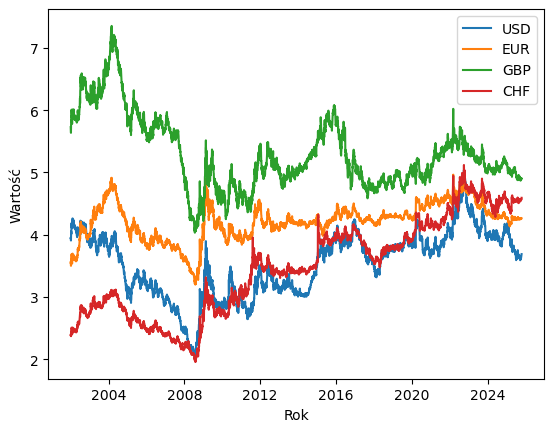

In [120]:
plt.plot(currenciesDF["Date"],currenciesDF['USD'],label='USD');
plt.plot(currenciesDF["Date"],currenciesDF['EUR'],label='EUR');
plt.plot(currenciesDF["Date"],currenciesDF['GBP'],label='GBP');
plt.plot(currenciesDF["Date"],currenciesDF['CHF'],label='CHF');
plt.legend()
plt.xlabel("Rok")
plt.ylabel("Wartość")

In [121]:
currenciesDF.isna().sum()

Date    0
USD     0
EUR     0
GBP     0
CHF     0
dtype: int64

In [122]:
currenciesDF.describe()

,Date,USD,EUR,GBP,CHF
count,6010,6010.000000,6010.000000,6010.000000,6010.000000
mean,2013-11-19 14:10:34.941763840,3.536767,4.215178,5.296953,3.472176
min,2002-01-02 00:00:00,2.022000,3.202600,4.033600,1.959600
25%,2007-12-10 06:00:00,3.132100,4.065075,4.908750,2.800175
50%,2013-11-16 12:00:00,3.675950,4.244500,5.149450,3.475650
75%,2019-10-30 18:00:00,3.931400,4.388275,5.653775,4.064175
max,2025-10-14 00:00:00,5.038100,4.964700,7.351600,5.120000
std,NaN,0.526002,0.294289,0.582943,0.761518


In [123]:
currenciesDF.dtypes

Date    datetime64[ns]
USD            float64
EUR            float64
GBP            float64
CHF            float64
dtype: object

# 2.Data Analysis

In [124]:
currenciesDF['USD_MA_100'] = currenciesDF.USD.rolling(100).mean()
currenciesDF['EUR_MA_100'] = currenciesDF.EUR.rolling(100).mean()
currenciesDF['GBP_MA_100'] = currenciesDF.GBP.rolling(100).mean()
currenciesDF['CHF_MA_100'] = currenciesDF.CHF.rolling(100).mean()

In [125]:
currenciesDF

,Date,USD,EUR,GBP,CHF,USD_MA_100,EUR_MA_100,GBP_MA_100,CHF_MA_100
0,2002-01-02,3.9480,3.5496,5.7275,2.3915,NaN,NaN,NaN,NaN
1,2002-01-03,3.9574,3.5699,5.7091,2.4034,NaN,NaN,NaN,NaN
2,2002-01-04,3.9383,3.5346,5.6681,2.3895,NaN,NaN,NaN,NaN
3,2002-01-07,3.9079,3.5032,5.6362,2.3726,NaN,NaN,NaN,NaN
4,2002-01-08,3.9322,3.5015,5.6709,2.3813,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6005,2025-10-08,3.6619,4.2533,4.9103,4.5712,3.665552,4.258731,4.947444,4.552260
6006,2025-10-09,3.6659,4.2569,4.8981,4.5704,3.664464,4.258803,4.945942,4.552588
6007,2025-10-10,3.6778,4.2583,4.8940,4.5675,3.663790,4.258983,4.944704,4.552898
6008,2025-10-13,3.6763,4.2592,4.8993,4.5719,3.662994,4.259128,4.943363,4.553161


Text(0, 0.5, 'Wartość')

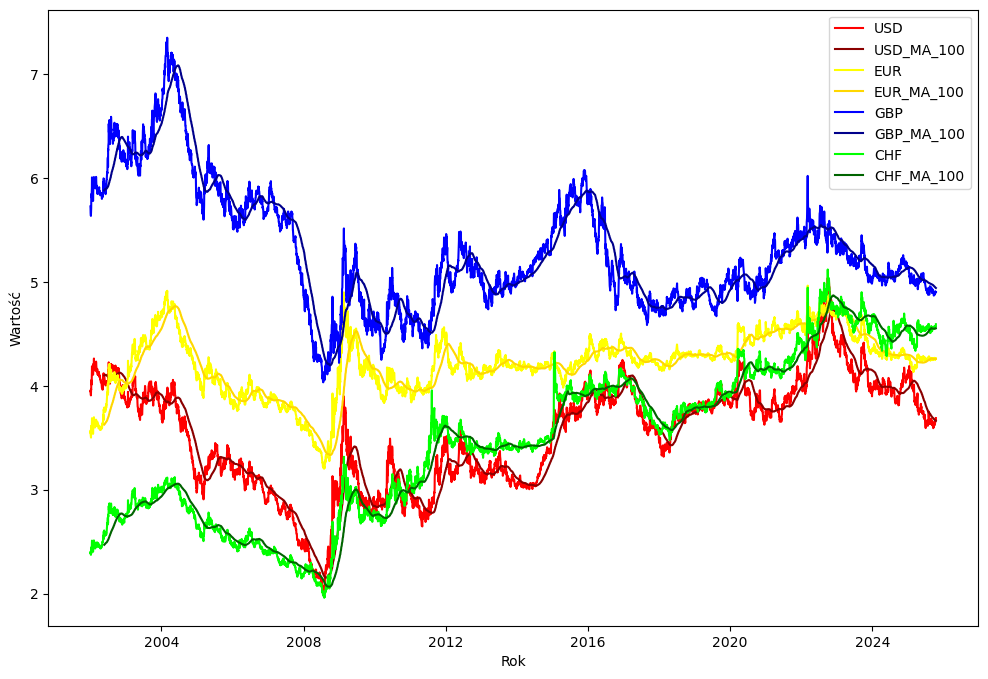

In [137]:
plt.figure(figsize=(12,8))
plt.plot(currenciesDF["Date"],currenciesDF['USD'],'red',label='USD');
plt.plot(currenciesDF["Date"],currenciesDF['USD_MA_100'],'darkred',label='USD_MA_100');
plt.plot(currenciesDF["Date"],currenciesDF['EUR'],'yellow',label='EUR');
plt.plot(currenciesDF["Date"],currenciesDF['EUR_MA_100'],'gold',label='EUR_MA_100');
plt.plot(currenciesDF["Date"],currenciesDF['GBP'],'blue',label='GBP');
plt.plot(currenciesDF["Date"],currenciesDF['GBP_MA_100'],'darkblue',label='GBP_MA_100');
plt.plot(currenciesDF["Date"],currenciesDF['CHF'],'lime',label='CHF');
plt.plot(currenciesDF["Date"],currenciesDF['CHF_MA_100'],'darkgreen',label='CHF_MA_100');
plt.legend(loc='upper right')
plt.xlabel("Rok")
plt.ylabel("Wartość")

In [138]:
currenciesDF['USD_PCT'] = currenciesDF.USD.pct_change()
currenciesDF['EUR_PCT'] = currenciesDF.EUR.pct_change()
currenciesDF['GBP_PCT'] = currenciesDF.GBP.pct_change()
currenciesDF['CHF_PCT'] = currenciesDF.CHF.pct_change()

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(currenciesDF["Date"],currenciesDF['USD'],'red',label='USD');
plt.plot(currenciesDF["Date"],currenciesDF['USD_MA_100'],'darkred',label='USD_MA_100');
plt.plot(currenciesDF["Date"],currenciesDF['EUR'],'yellow',label='EUR');
plt.plot(currenciesDF["Date"],currenciesDF['EUR_MA_100'],'gold',label='EUR_MA_100');
plt.plot(currenciesDF["Date"],currenciesDF['GBP'],'blue',label='GBP');
plt.plot(currenciesDF["Date"],currenciesDF['GBP_MA_100'],'darkblue',label='GBP_MA_100');
plt.plot(currenciesDF["Date"],currenciesDF['CHF'],'lime',label='CHF');
plt.plot(currenciesDF["Date"],currenciesDF['CHF_MA_100'],'darkgreen',label='CHF_MA_100');
plt.legend(loc='upper right')
plt.xlabel("Rok")
plt.ylabel("Wartość")